#      Movie Recommender using content based approach

In [2]:
import numpy as np
import pandas as pd

In [ ]:
movies=pd.read_csv('tmdb_5000_movies.csv') credits=pd.read_csv('tmdb_5000_credits.csv')

 movies=pd.read_csv('tmdb_5000_movies.csv')
 credits=pd.read_csv('tmdb_5000_credits.csv')

In [4]:
movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [5]:
credits.head(1)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [6]:
movies.shape

(4803, 20)

In [7]:
#credits.shape

In [8]:
movies=movies.merge(credits,on='title')

In [9]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [10]:
# genres
# id 
# keywords
# title
# overview 
# cast
# crew

movies=movies[['movie_id','title','overview','genres','keywords','cast','crew']]

In [11]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [12]:
movies.isnull().sum()

movie_id    0
title       0
overview    3
genres      0
keywords    0
cast        0
crew        0
dtype: int64

In [13]:
movies.dropna(inplace=True)

In [14]:
movies.duplicated().sum()

0

In [15]:
movies.iloc[0].genres

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [16]:
import ast

In [17]:
def convert(text):
    L=[]
    for i in ast.literal_eval(text):
        L.append(i['name'])
    return L

In [18]:
movies.dropna(inplace=True)

In [19]:
movies['genres'] = movies['genres'].apply(convert)
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [20]:
movies['keywords'] = movies['keywords'].apply(convert)

In [21]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [22]:
import ast
ast.literal_eval('[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]')

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [23]:
def convert3(text):
    L = []
    counter = 0
    for i in ast.literal_eval(text):
        if counter < 3:
            L.append(i['name'])
            counter+=1
        else:
            break
    
    return L 

In [24]:
 movies['cast'] = movies['cast'].apply(convert)
 movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weave...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman, A...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton,...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [25]:
def find_director(text):
    L1=[]
    for i in ast.literal_eval(text):
        if(i['job'] == 'Director'):
            L1.append(i['name'])
        else:
            break
    return L1

In [26]:
movies['crew'] = movies['crew'].apply(find_director)

In [27]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weave...",[]
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley, ...",[]
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",[]
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman, A...",[]
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton,...",[]


In [28]:
movies['overview'][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

In [29]:
 movies['overview'] = movies['overview'].apply(lambda x:x.split())
 

In [30]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weave...",[]
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley, ...",[]
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",[]
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman, A...",[]
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton,...",[]


In [31]:
movies['genres'] = movies['genres'].apply(lambda x:[i.replace(" ","") for i in x])
movies['cast'] = movies['cast'].apply(lambda x:[i.replace(" ","") for i in x])
movies['keywords'] = movies['keywords'].apply(lambda x:[i.replace(" ","") for i in x])
movies['crew'] = movies['crew'].apply(lambda x:[i.replace(" ","") for i in x])

In [32]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver, ...",[]
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley, Ste...",[]
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux, Ralp...",[]
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman, Anne...",[]
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton, Wi...",[]


In [33]:
movies['tags'] = movies['overview'] + movies['genres'] + movies['keywords'] + movies['crew'] + movies['cast']

In [34]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver, ...",[],"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley, Ste...",[],"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux, Ralp...",[],"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman, Anne...",[],"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton, Wi...",[],"[John, Carter, is, a, war-weary,, former, mili..."


In [35]:
new_df = movies[['movie_id','title','tags']]

In [36]:
new_df['tags'] = new_df['tags'].apply(lambda x:" ".join(x))

C:\Users\Hrittik\AppData\Local\Temp\ipykernel_13100\3089450492.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(lambda x:" ".join(x))


In [37]:
new_df.head()

,movie_id,title,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...
4,49529,John Carter,"John Carter is a war-weary, former military ca..."


In [38]:
new_df['tags'][2]

'A cryptic message from Bond’s past sends him on a trail to uncover a sinister organization. While M battles political forces to keep the secret service alive, Bond peels back the layers of deceit to reveal the terrible truth behind SPECTRE. Action Adventure Crime spy basedonnovel secretagent sequel mi6 britishsecretservice unitedkingdom DanielCraig ChristophWaltz LéaSeydoux RalphFiennes MonicaBellucci BenWhishaw NaomieHarris DaveBautista AndrewScott RoryKinnear JesperChristensen AlessandroCremona StephanieSigman TenochHuerta AdrianaPaz DomenicoFortunato MarcoZingaro StefanoElfiDiClaudia IanBonar TamWilliams RichardBanham PipCarter SimonLenagan AlessandroBressanello MarcZinga BrigitteMillar AdelBencherif GediminasAdomaitis PeppeLanzetta FrancescoArca MatteoTaranto EmilioAniba BenitoSagredo DaiTabuchi GeorgeLasha SargonYelda AndyCheung ErickHayden OlegMirochnikov AntonioSalines MiloudMouradBenamara GidoSchimanski NigelBarber PatriceNaiambana StephaneCornicard GaryFannin SadaoUeda Philli

In [39]:
new_df['tags'] = new_df['tags'].apply(lambda x:x.lower())

C:\Users\Hrittik\AppData\Local\Temp\ipykernel_13100\3214958533.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(lambda x:x.lower())


In [40]:
new_df.head()


,movie_id,title,tags
0,19995,Avatar,"in the 22nd century, a paraplegic marine is di..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believed to be dead, ha..."
2,206647,Spectre,a cryptic message from bond’s past sends him o...
3,49026,The Dark Knight Rises,following the death of district attorney harve...
4,49529,John Carter,"john carter is a war-weary, former military ca..."


In [41]:
#applying steming process to filter...
import nltk

In [42]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [43]:
def stem(text):
    y = []
    
    for i in text.split():
        y.append(ps.stem(i))
    return " ".join(y)  
        

In [44]:
new_df['tags'] = new_df['tags'].apply(stem)

C:\Users\Hrittik\AppData\Local\Temp\ipykernel_13100\3213734980.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(stem)


In [45]:
new_df['tags'][0]

'in the 22nd century, a parapleg marin is dispatch to the moon pandora on a uniqu mission, but becom torn between follow order and protect an alien civilization. action adventur fantasi sciencefict cultureclash futur spacewar spacecoloni societi spacetravel futurist romanc space alien tribe alienplanet cgi marin soldier battl loveaffair antiwar powerrel mindandsoul 3d samworthington zoesaldana sigourneyweav stephenlang michellerodriguez giovanniribisi joeldavidmoor cchpounder wesstudi lazalonso dileeprao mattgerald seananthonymoran jasonwhyt scottlawr kellykilgour jamespatrickpitt seanpatrickmurphi peterdillon kevindorman kelsonhenderson davidvanhorn jacobtomuri michaelblain-rozgay joncurri lukehawk woodyschultz petermensah soniaye jahnelcurfman ilramchoi kylawarren lisaroumain debrawilson chrismala taylorkibbi jodielandau julielamm cullenb.madden josephbradymadden frankietorr austinwilson sarawilson tamicawashington-mil lucybri nathanmeist gerryblair matthewchamberlain paulyat wraywil

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,stop_words='english')

In [47]:
vectors= cv.fit_transform(new_df['tags']).toarray()

In [48]:
vectors.shape

(4806, 5000)

In [49]:
vectors[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [50]:
from sklearn.metrics.pairwise import cosine_similarity

In [51]:
similarity = cosine_similarity(vectors)

In [52]:
sorted(list(enumerate(similarity[0])),reverse=True,key=lambda x:x[1])[1:11]

[(1216, 0.26247211381928137),
 (2333, 0.22936585546278224),
 (582, 0.22653609644731054),
 (539, 0.22116293423234568),
 (507, 0.21945508678783648),
 (3730, 0.215206411665471),
 (2409, 0.21281413268968716),
 (1920, 0.21248647409244853),
 (4048, 0.20430156738209965),
 (61, 0.20241022618818408)]

In [54]:
def recommend(movie):
    movie_index = new_df[new_df['title'] == movie].index[0]
    distances = similarity[movie_index]
    movies_list = sorted(list(enumerate(distances)),reverse=True,key=lambda x:x[1])[1:11]
    
    for i in movies_list:
        print(new_df.iloc[i[0]].title)
         

In [55]:
recommend('Avatar')

Aliens vs Predator: Requiem
Predator
Battle: Los Angeles
Titan A.E.
Independence Day
Falcon Rising
Aliens
Lifeforce
U.F.O.
Jupiter Ascending


# Movie Recommender using Collabrative approach

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse

In [4]:
ratings = pd.read_csv("ratings_small.csv")
movies = pd.read_csv("movies.csv")

movies.head()
ratings = pd.merge(movies, ratings).drop(['timestamp'],axis=1)
print(ratings.shape)
ratings.head()

(97243, 5)


,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,3.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,9,4.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,13,5.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,19,3.0


In [5]:
df=pd.merge(ratings,movies, how='left',on='movieId')
df.head()

,movieId,title_x,genres_x,userId,rating,title_y,genres_y
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,3.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,9,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,13,5.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,19,3.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [6]:
df1=df.groupby(['title_x'])[['rating']].sum()
high_rated=df1.nlargest(20,'rating')
high_rated.head()

,rating
title_x,
"Shawshank Redemption, The (1994)",1395.5
Forrest Gump (1994),1382.5
Pulp Fiction (1994),1379.0
"Silence of the Lambs, The (1991)",1258.0
Star Wars: Episode IV - A New Hope (1977),1228.5


<BarContainer object of 20 artists>

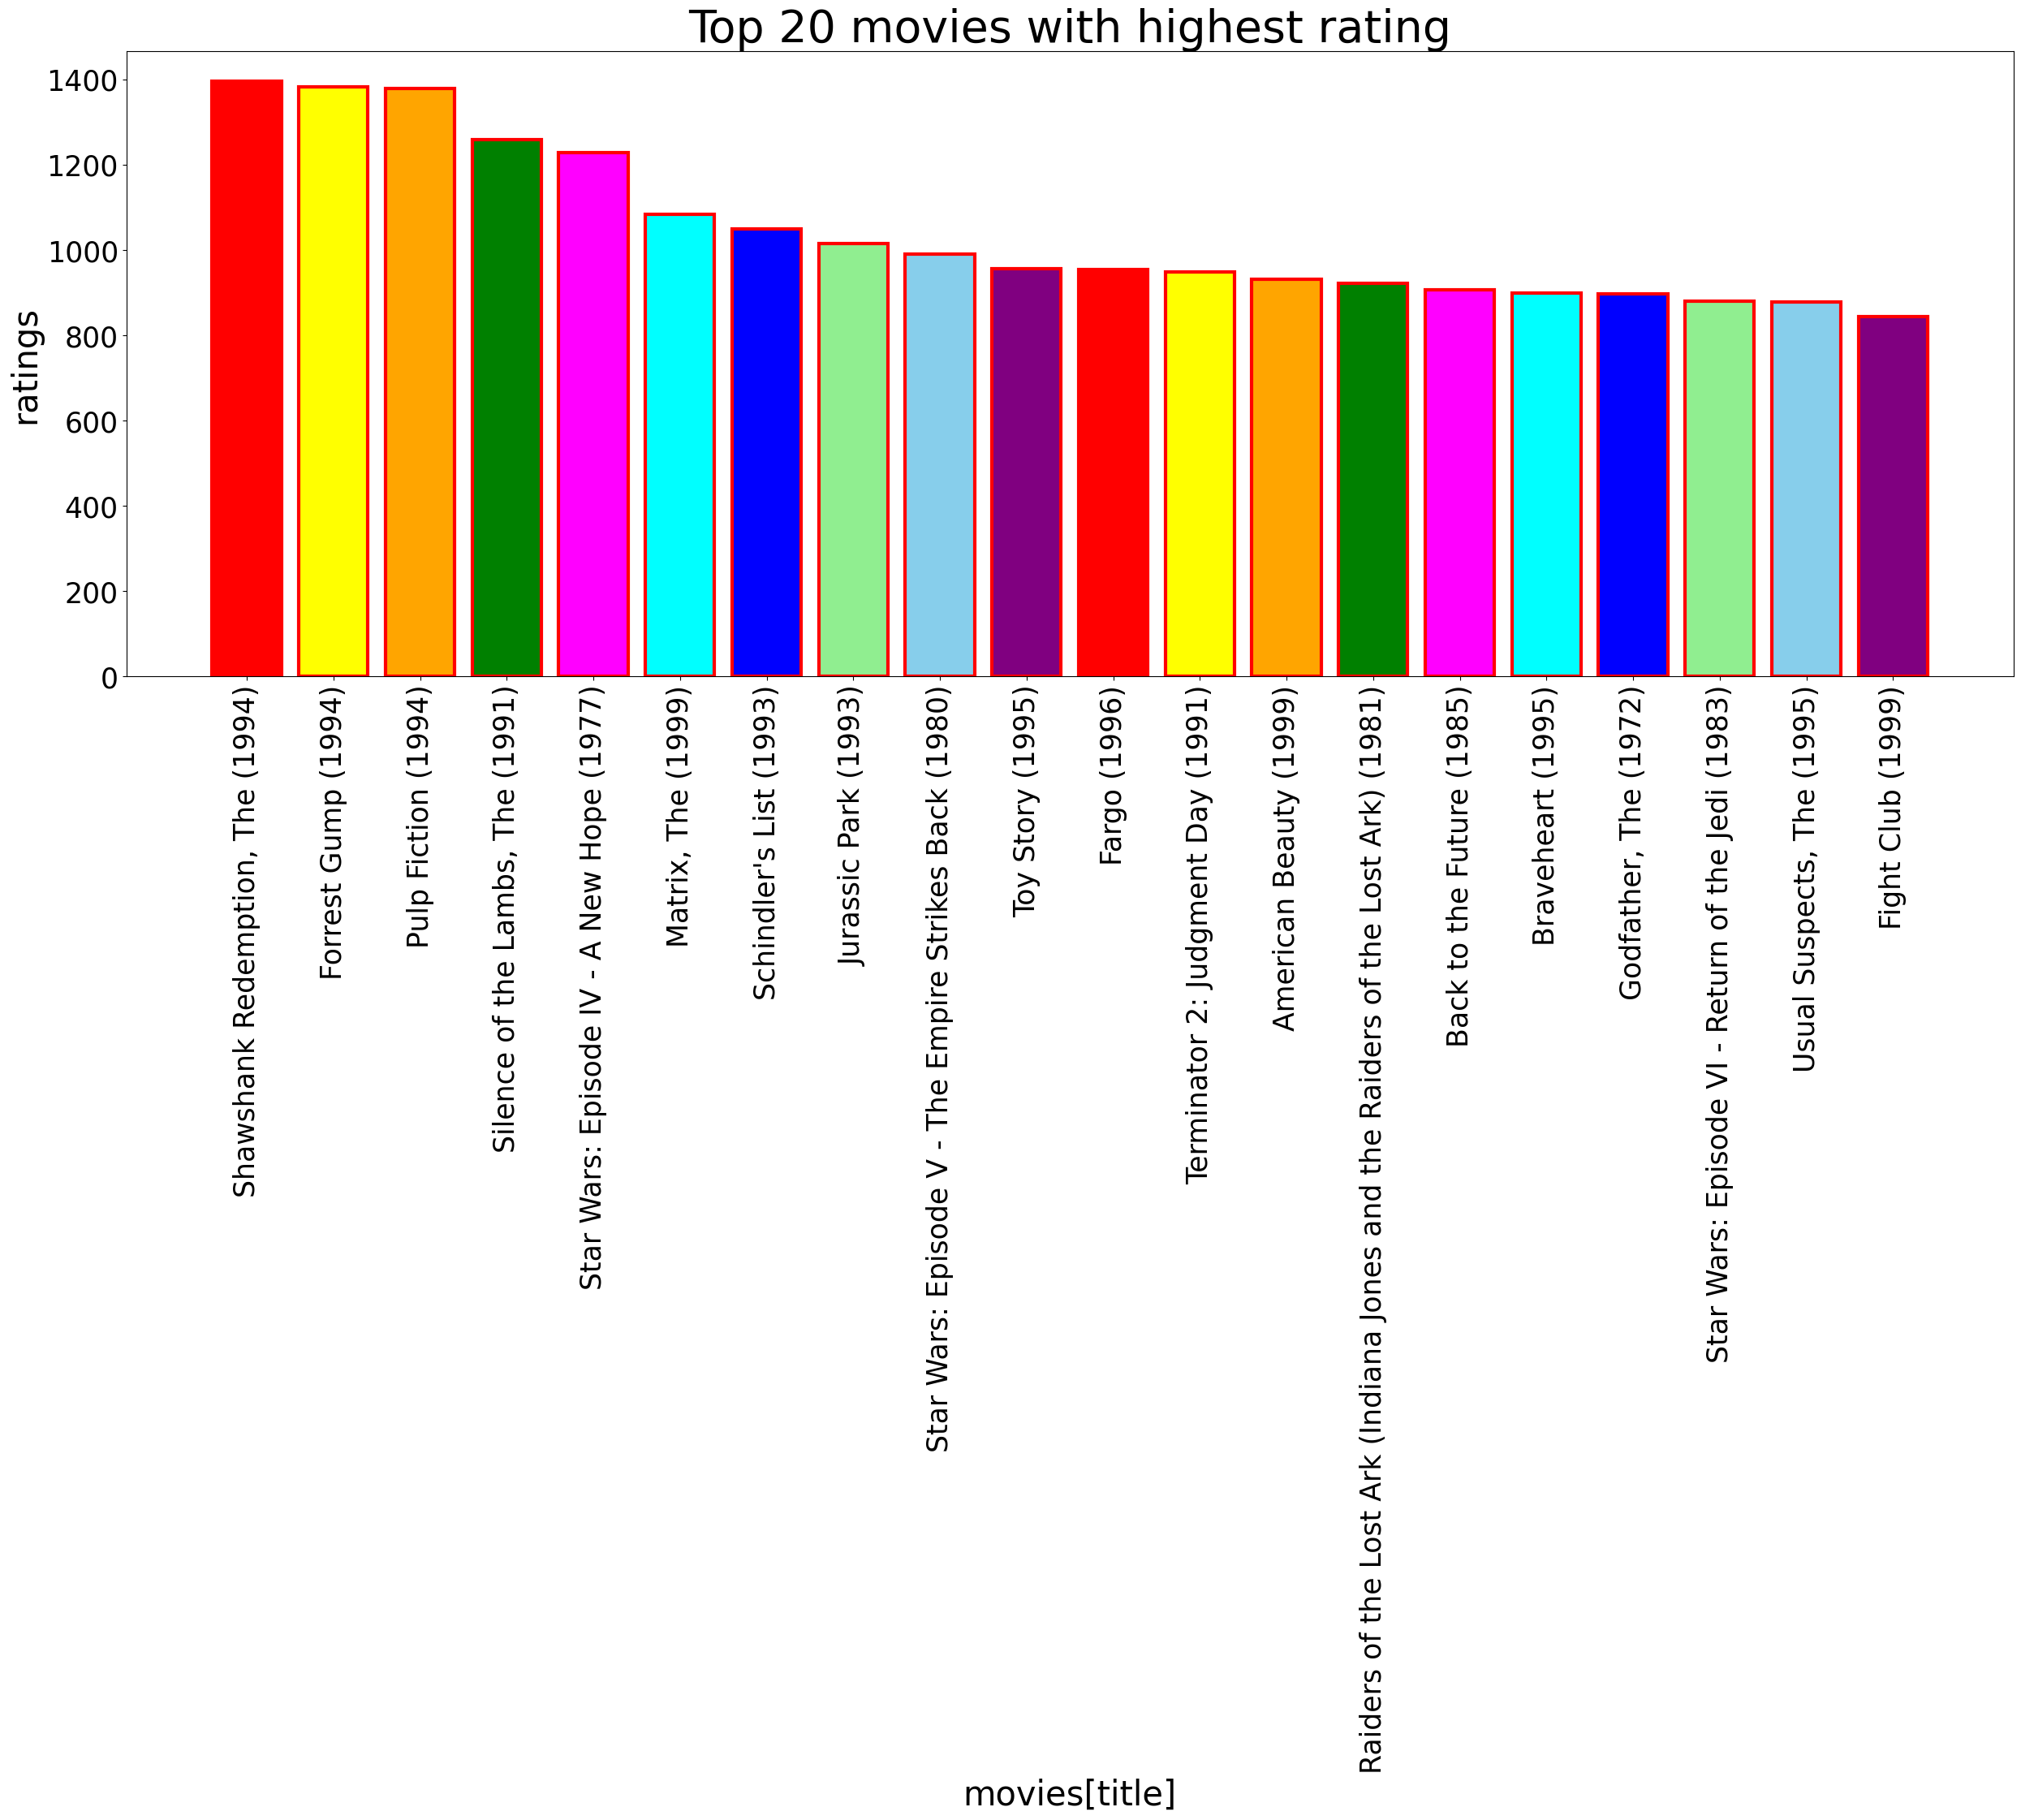

In [9]:
plt.figure(figsize=(30,10))
plt.title('Top 20 movies with highest rating',fontsize=40)
colors=['red','yellow','orange','green','magenta','cyan','blue','lightgreen','skyblue','purple']
plt.ylabel('ratings',fontsize=30)
plt.xticks(fontsize=25,rotation=90)
plt.xlabel('movies[title]',fontsize=30)
plt.yticks(fontsize=25)
plt.bar(high_rated.index,high_rated['rating'],linewidth=3,edgecolor='red',color=colors)

In [7]:
userRatings = ratings.pivot_table(index=['userId'],columns=['title'],values='rating')
userRatings.head()
print("Before: ",userRatings.shape)
userRatings = userRatings.dropna(thresh=10, axis=1).fillna(0,axis=1)
#userRatings.fillna(0, inplace=True)
print("After: ",userRatings.shape)

Before:  (671, 7062)
After:  (671, 2243)


In [8]:
corrMatrix = userRatings.corr(method='pearson')
corrMatrix.head(100)

title,"'burbs, The (1989)",(500) Days of Summer (2009),...And Justice for All (1979),10 Things I Hate About You (1999),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),102 Dalmatians (2000),12 Angry Men (1957),12 Years a Slave (2013),127 Hours (2010),...,Young Guns II (1990),Zack and Miri Make a Porno (2008),Zero Dark Thirty (2012),Zero Effect (1998),Zodiac (2007),Zombieland (2009),Zoolander (2001),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986)
title,,,,,,,,,,,,,,,,,,,,,
"'burbs, The (1989)",1.000000,0.049358,0.183453,0.082564,0.101948,0.162694,-0.002466,0.067309,0.020832,0.105458,...,0.297098,0.015872,0.040455,0.203206,0.082473,0.086927,0.191698,0.057206,0.099502,0.308778
(500) Days of Summer (2009),0.049358,1.000000,0.026848,0.230095,0.078582,0.040188,0.068425,0.156769,0.117532,0.380868,...,0.000182,0.172106,0.345785,-0.034352,0.279399,0.348115,0.161343,-0.029451,0.107851,0.013626
...And Justice for All (1979),0.183453,0.026848,1.000000,0.040358,0.141549,0.334189,0.005991,0.283803,-0.017748,0.069345,...,0.013836,-0.018287,0.009675,0.081699,0.036289,0.007654,0.036299,0.132239,-0.014250,0.220807
10 Things I Hate About You (1999),0.082564,0.230095,0.040358,1.000000,0.180185,0.182573,0.163474,0.065632,0.027600,0.106938,...,0.031471,0.178147,0.123387,0.121883,0.170970,0.126995,0.256138,0.101245,0.173165,0.171767
101 Dalmatians (1996),0.101948,0.078582,0.141549,0.180185,1.000000,0.353796,0.118462,0.045265,-0.030411,0.037087,...,0.098240,0.008197,0.015425,0.089189,0.053503,0.011000,0.037184,0.024336,0.023662,0.123471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
All That Jazz (1979),0.071329,-0.006805,0.331012,-0.016868,0.083577,0.235435,-0.019459,0.154768,-0.022937,0.030181,...,0.125995,-0.023633,0.077255,0.052386,0.032157,-0.003498,0.004471,0.137846,-0.029133,0.096082
All the President's Men (1976),0.049501,0.083447,0.113703,0.155949,0.055873,0.166671,-0.019675,0.237888,-0.023192,0.056458,...,0.030931,0.128158,0.212604,0.205349,0.190511,0.080037,0.154620,0.184145,0.153382,0.212396
Almost Famous (2000),0.098950,0.172402,0.083896,0.161910,0.015288,0.109806,0.034089,0.203425,0.046136,0.110788,...,0.162815,0.139108,0.225793,0.065256,0.276196,0.172509,0.251615,0.094895,0.123510,0.129009


In [9]:
def get_similar(movie_name,rating):
    similar_ratings = corrMatrix[movie_name]*(rating-2.5)
    similar_ratings = similar_ratings.sort_values(ascending=False)
    #print(type(similar_ratings))
    return similar_ratings

In [10]:
romantic_lover = [("(500) Days of Summer (2009)",5),("Alice in Wonderland (2010)",3),("Aliens (1986)",1),("2001: A Space Odyssey (1968)",2)]
similar_movies = pd.DataFrame()
for movie,rating in romantic_lover:
    similar_movies = similar_movies.append(get_similar(movie,rating),ignore_index = True)

similar_movies.head(10)

C:\Users\Hrittik\AppData\Local\Temp\ipykernel_12752\1004585255.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similar_movies = similar_movies.append(get_similar(movie,rating),ignore_index = True)
C:\Users\Hrittik\AppData\Local\Temp\ipykernel_12752\1004585255.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similar_movies = similar_movies.append(get_similar(movie,rating),ignore_index = True)
C:\Users\Hrittik\AppData\Local\Temp\ipykernel_12752\1004585255.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similar_movies = similar_movies.append(get_similar(movie,rating),ignore_index = True)
C:\Users\Hrittik\AppData\Local\Temp\ipykernel_12752\1004585255.py:4: FutureWarning: The frame.append method is deprecated and will

title,(500) Days of Summer (2009),"Social Network, The (2010)",Up in the Air (2009),Forgetting Sarah Marshall (2008),"Hangover, The (2009)",Juno (2007),Scott Pilgrim vs. the World (2010),Stranger than Fiction (2006),Adventureland (2009),Little Miss Sunshine (2006),...,"Craft, The (1996)","Firm, The (1993)",French Kiss (1995),"Bridges of Madison County, The (1995)",Executive Decision (1996),Waterworld (1995),Disclosure (1994),Mighty Aphrodite (1995),Broken Arrow (1996),"Birdcage, The (1996)"
0,2.500000,1.221531,1.165431,1.161772,1.143526,1.125098,1.059594,1.059370,1.040743,1.039889,...,-0.147239,-0.160731,-0.163651,-0.170907,-0.170938,-0.174239,-0.179944,-0.180253,-0.191578,-0.192027
1,0.076874,0.125936,0.082362,0.049435,0.127701,0.117507,0.150894,0.096049,0.150260,0.096228,...,-0.003071,-0.016302,-0.025429,-0.022109,0.004239,0.017598,-0.023278,-0.011509,-0.017023,-0.015931
2,-0.123409,-0.167614,-0.129684,-0.217902,-0.156767,-0.107393,-0.172516,-0.150667,-0.121234,-0.069092,...,0.000718,-0.140263,-0.019289,-0.052444,-0.000728,-0.123541,0.000184,-0.111601,-0.066030,-0.116577
3,-0.065411,-0.113242,-0.040148,-0.063106,-0.083836,-0.076505,-0.109757,-0.056387,-0.084277,-0.067471,...,0.001788,-0.024276,-0.002957,-0.008093,0.007338,-0.019030,0.012001,-0.072752,0.000105,-0.032566


In [11]:
similar_movies.sum().sort_values(ascending=False).head(20)

title
(500) Days of Summer (2009)                            2.388054
Up in the Air (2009)                                   1.077962
Social Network, The (2010)                             1.066612
Juno (2007)                                            1.058707
Hangover, The (2009)                                   1.030624
Black Swan (2010)                                      1.029750
Avatar (2009)                                          1.004151
Slumdog Millionaire (2008)                             1.003975
Little Miss Sunshine (2006)                            0.999555
Adventureland (2009)                                   0.985492
Green Lantern (2011)                                   0.976252
Stranger than Fiction (2006)                           0.948365
Tangled (2010)                                         0.933885
Forgetting Sarah Marshall (2008)                       0.930199
Scott Pilgrim vs. the World (2010)                     0.928215
Toy Story 3 (2010)                

In [12]:
action_lover = [("Amazing Spider-Man, The (2012)",5),("Mission: Impossible III (2006)",4),("Toy Story 3 (2010)",2),("2 Fast 2 Furious (Fast and the Furious 2, The) (2003)",4)]
similar_movies = pd.DataFrame()
for movie,rating in action_lover:
    similar_movies = similar_movies.append(get_similar(movie,rating),ignore_index = True)

similar_movies.head()
similar_movies.sum().sort_values(ascending=False)

C:\Users\Hrittik\AppData\Local\Temp\ipykernel_12752\1156190694.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similar_movies = similar_movies.append(get_similar(movie,rating),ignore_index = True)
C:\Users\Hrittik\AppData\Local\Temp\ipykernel_12752\1156190694.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similar_movies = similar_movies.append(get_similar(movie,rating),ignore_index = True)
C:\Users\Hrittik\AppData\Local\Temp\ipykernel_12752\1156190694.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similar_movies = similar_movies.append(get_similar(movie,rating),ignore_index = True)
C:\Users\Hrittik\AppData\Local\Temp\ipykernel_12752\1156190694.py:4: FutureWarning: The frame.append method is deprecated and will

title
Amazing Spider-Man, The (2012)                                2.787758
Mission: Impossible III (2006)                                2.205062
2 Fast 2 Furious (Fast and the Furious 2, The) (2003)         2.014295
Skyfall (2012)                                                1.968146
21 Jump Street (2012)                                         1.934019
                                                                ...   
Mighty Aphrodite (1995)                                      -0.138371
Six Degrees of Separation (1993)                             -0.139407
Nell (1994)                                                  -0.144183
Mary Shelley's Frankenstein (Frankenstein) (1994)            -0.144426
Like Water for Chocolate (Como agua para chocolate) (1992)   -0.179393
Length: 2243, dtype: float64

In [16]:
# train_averages = dict()
# # get the global average of ratings in our train set.
# train_global_average = train_sparse_matrix.sum()/train_sparse_matrix.count_nonzero()
# train_averages['global'] = train_global_average
# train_averages
# #Output: {‘global’: 3.5199769425298757}
# #Next, let’s create a function which takes the sparse matrix as input and gives the average ratings of a movie given by all users, and the average rating of all movies given by a single user.
# # get the user averages in dictionary (key: user_id/movie_id, value: avg rating)
# def get_average_ratings(sparse_matrix, of_users):
# # average ratings of user/axes
# ax = 1 if of_users else 0 # 1 - User axes,0 - Movie axes
# # ".A1" is for converting Column_Matrix to 1-D numpy array
# sum_of_ratings = sparse_matrix.sum(axis=ax).A1
# # Boolean matrix of ratings ( whether a user rated that movie or not)
# is_rated = sparse_matrix!=0
# # no of ratings that each user OR movie..
# no_of_ratings = is_rated.sum(axis=ax).A1
# # max_user and max_movie ids in sparse matrix
# u,m = sparse_matrix.shape
# # create a dictionary of users and their average ratings..
# average_ratings = { i : sum_of_ratings[i]/no_of_ratings[i]
# for i in range(u if of_users else m)
# if no_of_ratings[i] !=0}
# #return that dictionary of average ratings
# return average_ratings

In [1]:
import pandas as pd
import numpy as np

In [27]:
rating = pd.read_csv("ratings_small.csv")
movies = movies=pd.read_csv('tmdb_5000_movies.csv')

In [28]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [30]:
rating.head()


,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [31]:
rating['userId'].value_counts().shape ## unique users

(671,)

In [32]:
x=rating['userId'].value_counts()>500

In [33]:
y = x[x].index

In [34]:
y.shape

(37,)

In [35]:
rating = rating[rating['userId'].isin(y)]

In [2]:
rating.shape

NameError: name 'rating' is not defined

In [1]:
movie_details = movies.merge(rating,on='movieId')
movie_details.head()

NameError: name 'movies' is not defined

In [59]:
number_rating = movie_details.groupby('title')['rating'].count().reset_index()

In [39]:
number_rating.rename(columns={'rating':'number of rating'},inplace=True)

In [40]:
number_rating.head()

,title,number of rating
0,'Round Midnight (1986),1
1,'Til There Was You (1997),1
2,"'burbs, The (1989)",9
3,'night Mother (1986),2
4,(500) Days of Summer (2009),11


In [41]:
df=movie_details.merge(number_rating,on='title')
df.head()

,movieId,title,genres,userId,rating,timestamp,number of rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.0,997938310,33
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,23,3.0,1148729853,33
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,30,4.0,944943070,33
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,48,4.0,1318796720,33
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,56,4.0,1467004817,33


In [42]:
df['rating']=df['rating'].astype(int)
df.head()

,movieId,title,genres,userId,rating,timestamp,number of rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2,997938310,33
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,23,3,1148729853,33
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,30,4,944943070,33
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,48,4,1318796720,33
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,56,4,1467004817,33


In [43]:
movie_pivot=df.pivot_table(columns='userId',index='title',values='rating')
movie_pivot.shape

(6220, 37)

In [44]:
movie_pivot.fillna(0,inplace=True)
movie_pivot

userId,15,23,30,48,56,73,102,105,119,212,...,518,529,547,564,575,580,587,624,654,664
title,,,,,,,,,,,,,,,,,,,,,
'Round Midnight (1986),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Til There Was You (1997),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
"'burbs, The (1989)",0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,4.0,0.0
'night Mother (1986),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
(500) Days of Summer (2009),0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,0.0,3.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
[REC] (2007),0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
eXistenZ (1999),3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,2.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0
xXx (2002),1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [45]:
from scipy.sparse import csr_matrix
movie_sparse=csr_matrix(movie_pivot)

In [46]:
from sklearn.neighbors import NearestNeighbors
model=NearestNeighbors( n_neighbors=7,algorithm='brute',metric='cosine')

In [47]:
model.fit(movie_sparse)

NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=7)

In [48]:
df.drop(columns=['genres','userId','rating'],inplace=True)

In [49]:
df.drop_duplicates(inplace=True)

In [50]:
df.to_csv('codf.csv',index=False)

In [51]:
distances,suggestions=model.kneighbors(movie_pivot.iloc[540,:].values.reshape(1,-1))
distances

array([[0.        , 0.16349809, 0.23528089, 0.24275981, 0.24516015,
        0.25838015, 0.25925926]])

In [52]:
suggestions

array([[ 540,  201, 4268, 1043, 1494, 4301, 4310]], dtype=int64)

In [53]:
df1=df.copy()
ti=[]
for i in df1['title']:
    ti.append(i.split(' (')[0])
df1['title']=ti

In [54]:
for i in range(len(suggestions)):
    print(movie_pivot.index[suggestions[i]])

Index(['Be Kind Rewind (2008)', 'Ali G Indahouse (2002)',
       'Pirates! Band of Misfits, The (2012)', 'Chappie (2015)',
       'Dictator, The (2012)', 'Point Break (1991)', 'Police Academy (1984)'],
      dtype='object', name='title')


In [55]:
def reco(movie_name):
    movie_id=df1[df1['title']=='Toy Story'].drop_duplicates('title')['movieId'].values[0]
    distances,suggestions=model.kneighbors(movie_pivot.iloc[movie_id,:].values.reshape(1,-1))
    
    
    
    for i in range(len(suggestions)):
        return (movie_pivot.index[suggestions[i]])

In [56]:
res=reco("It Conquered the World")

In [57]:
for i in res:
    print(i)

Amityville: A New Generation (1993)
Children of the Corn III (1994)
Amityville II: The Possession (1982)
Amityville 1992: It's About Time (1992)
Children of the Corn II: The Final Sacrifice (1993)
Jeffrey (1995)
Sum of Us, The (1994)


In [5]:
from surprise import SVD
import numpy as np
import surprise
from surprise import Reader, Dataset
# It is to specify how to read the data frame.
reader = Reader(rating_scale=(1,5))
# create the traindata from the data frame
train_data_mf = Dataset.load_from_df(train_data[['userId', 'movieId', 'rating']], reader)
# build the train set from traindata. 
#It is of dataset format from surprise library
trainset = train_data_mf.build_full_trainset()
svd = SVD(n_factors=100, biased=True, random_state=15, verbose=True)
svd.fit(trainset)

NameError: name 'train_data' is not defined

NameError: name 'xgb_model' is not defined